In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import statsmodels.formula.api as smf

facebook = pd.read_csv('DATA/dataset_Facebook.csv', delimiter=";")


In [2]:
facebook.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 499 non-null    float64
 7   Lifetime

In [3]:
facebook = facebook[facebook.share.notna()]
facebook = facebook[facebook.Paid.notna()]
facebook

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,85093,Photo,3,1,7,10,0.0,5400,9218,810,756,1003,5654,3230,422,10,125.0,41.0,176
495,85093,Photo,3,1,7,2,0.0,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84
496,81370,Photo,2,1,5,8,0.0,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75
497,81370,Photo,1,1,5,2,0.0,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115


In [4]:
facebook.reset_index(inplace=True)

In [5]:
facebook

,index,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,494,85093,Photo,3,1,7,10,0.0,5400,9218,810,756,1003,5654,3230,422,10,125.0,41.0,176
491,495,85093,Photo,3,1,7,2,0.0,4684,7536,733,708,985,4750,2876,392,5,53.0,26.0,84
492,496,81370,Photo,2,1,5,8,0.0,3480,6229,537,508,687,3961,2104,301,0,53.0,22.0,75
493,497,81370,Photo,1,1,5,2,0.0,3778,7216,625,572,795,4742,2388,363,4,93.0,18.0,115


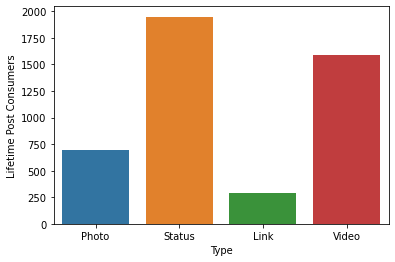

In [6]:
sns.barplot(x='Type', y='Lifetime Post Consumers', data=facebook, ci=None)

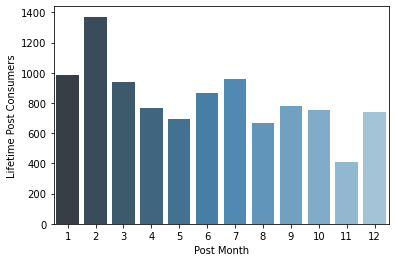

In [7]:
sns.barplot(x='Post Month', y='Lifetime Post Consumers', data=facebook, ci=None,palette='Blues_d')

In [8]:
grouped = facebook.groupby('Post Month')
grouped = grouped.aggregate(np.mean).reset_index()
grouped

,Post Month,index,Page total likes,Category,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,1,486.500000,85631.291667,2.375000,4.500000,7.083333,0.166667,12696.250000,9498.291667,1053.625000,983.750000,1338.875000,9671.458333,5551.833333,486.166667,6.208333,124.208333,31.916667,162.333333
1,2,461.500000,92346.500000,1.961538,3.846154,8.461538,0.307692,23643.307692,83905.038462,1475.961538,1371.192308,1957.307692,44549.692308,8767.615385,726.269231,10.538462,192.961538,38.538462,242.038462
2,3,430.500000,100486.083333,1.222222,4.361111,11.250000,0.222222,13187.138889,60588.472222,981.000000,937.194444,2669.111111,44992.944444,6476.388889,466.416667,2.888889,83.111111,11.055556,97.055556
3,4,387.500000,110224.300000,2.020000,4.160000,8.420000,0.400000,18655.200000,29399.880000,883.940000,764.740000,1228.840000,14904.740000,8351.840000,630.320000,5.320000,182.740000,29.460000,217.520000
4,5,344.000000,117900.513514,2.486486,4.162162,8.324324,0.216216,10680.216216,17480.459459,842.351351,697.189189,1126.648649,11522.675676,6577.675676,594.756757,7.918919,216.162162,32.216216,256.297297
5,6,301.000000,124980.775510,2.000000,3.693878,8.061224,0.265306,16730.387755,27890.448980,958.040816,865.897959,1861.081633,12942.551020,6775.693878,600.673469,6.469388,133.612245,17.632653,157.714286
6,7,250.500000,129719.192308,1.942308,3.942308,8.384615,0.384615,19569.884615,33420.865385,1151.461538,961.346154,1825.615385,15689.788462,8349.288462,735.000000,15.326923,272.519231,40.653846,328.500000
7,8,207.500000,132553.147059,2.058824,4.088235,7.323529,0.294118,12082.147059,25901.176471,816.735294,670.058824,1072.352941,18848.500000,8177.264706,640.235294,5.705882,198.441176,21.235294,225.382353
8,9,172.742857,135178.400000,2.028571,3.628571,6.342857,0.314286,8043.685714,15153.028571,934.742857,779.857143,1094.657143,9715.914286,5010.200000,722.142857,11.342857,237.028571,37.571429,285.942857
9,10,124.824561,136421.245614,1.561404,4.964912,7.578947,0.210526,10339.701754,22413.421053,858.894737,756.263158,1307.350877,10559.421053,4990.947368,664.719298,6.350877,161.929825,24.087719,192.368421


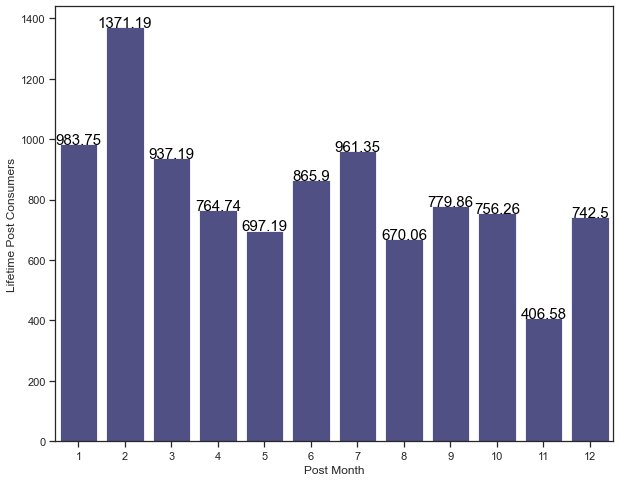

In [15]:
sns.set(rc={'figure.figsize': (10, 8)})
sns.set_style('ticks')
g = sns.barplot(x='Post Month',y='Lifetime Post Consumers',data=grouped,ci=None, color='midnightblue',alpha=.8)
for index, row in grouped.iterrows():
    g.text(row.name,row['Lifetime Post Consumers'], round(row['Lifetime Post Consumers'],2), color='black', ha='center',size=15)

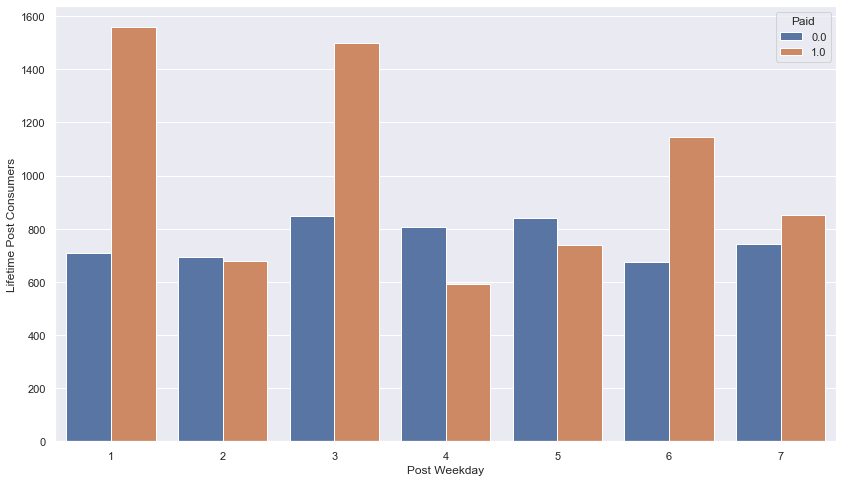

In [13]:
# MJ's paid/unpaid FB ads 
sns.set(rc={'figure.figsize': (14, 8)})
# sns.set_style('ticks')

sns.barplot(x = 'Post Weekday', y ='Lifetime Post Consumers', data = facebook, hue = 'Paid', ci = None)